# Introduction to Timeseries
A time series is a series of data points recorded at different time-intervals. 

<a class="anchor" id="0.1"></a>
## **Table of Contents**


1.	[Introduction to Time-series Analysis](#1)
2.	[Types of data](#2)
3.	[Time-series terminology](#3)
4.	[Time-series Analysis](#4)
5.	[Visualize the Time-series](#5)
6.	[Patterns in a Time-series](#6)
7.	[Decomposition of a Time-series](#7)
    - 7.1	[Additive and Multiplicative Time-series](#7.1)
8.	[Stationary and Non-Stationary Time-series](#8)
9.	[How to make a time-series stationary](#9)
    - 9.1   [Introduction to Differencing](#9.1)
10.	[How to test for stationarity](#10)
    - 10.1	[Augmented Dickey Fuller test (ADF Test)](#10.1)
        - 10.1.1	[Difference between white noise and a stationary series](#10.1.1)
    - 10.2	[Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)](#10.2)
    - 10.3	[Philips Perron test (PP Test)](#10.3)
11.	[Detrend a Time-series](#11)
12.	[Deseasonalize a Time-series](#12)
13.	[How to test for seasonality of a time-series](#13)
14.	[Autocorrelation and Partial Autocorrelation Functions](#14)
15.	[Computation of Partial Autocorrelation Function](#15)
16.	[Lag Plots](#16)
17.	[Granger Causality Test](#17)
18.	[Smoothening a Time-series](#18)
19.	[References](#19)

# **1. Introduction to Time-series Analysis** <a class="anchor" id="1"></a>


[Table of Contents](#0.1)



- A **time-series**: series of data points or observations recorded at different or regular time intervals. General frequency can be hourly, daily, weekly, monthly, quarterly or annually.


- **Time-Series Forecasting**: use model to predict future values of a time-series based on past results

### **Components of a Time-Series**


- **Trend** - shows a general direction of the time series data over a long period of time (e.g. increasing(upward), decreasing(downward), or horizontal(stationary))


- **Seasonality** - exhibits a trend that repeats with respect to timing, direction, and magnitude (e.g. increase in water consumption in summer due to hot weather conditions)


- **Cyclical Component** - trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but show a period that is associated to the nature of the time-series


- **Irregular Variation** - fluctuations in the time-series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random


- **ETS Decomposition** - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality

# **2. Types of data** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

1 **Time series data** - The observations of the values of a variable recorded at different points in time is called time-series data


2 **Cross sectional data** - It is the data of one or more variables recorded at the same point in time


3 **Pooled data**- It is the combination of time series data and cross sectional data


# **3. Time-series terminology** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

1	**Dependence**- It refers to the association of two observations of the same variable at prior time periods

2	**Stationarity**- It shows the mean value of the series that remains constant over the time period. If past effects accumulate and the values increase towards infinity then stationarity is not met

3	**Differencing**- Differencing is used to make the series stationary and to control the auto-correlations

4	**Specification** - It may involve the testing of the linear or non-linear relationships of dependent variables by using time-series models such as ARIMA models

5	**Exponential Smoothing** - Exponential smoothing in time-series analysis predicts the one next period value based on the past and current value.  It involves averaging of data such that the non-systematic components of each individual case or observation cancel out each other.  The exponential smoothing method is used to predict the short term prediction

6	**Curve fitting** - Curve fitting regression in time series analysis is used when data is in a non-linear relationship

7	**ARIMA** - ARIMA stands for Auto Regressive Integrated Moving Average

# **4. Time-series Analysis** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)


## **4.1 Basic set up** <a class="anchor" id="4.1"></a>

[Table of Contents](#0.1)

In [57]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import autocorrelation_plot

import os

## **4.2 Import data** <a class="anchor" id="4.2"></a>

[Table of Contents](#0.1)

In [58]:
df = pd.read_csv('data/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [59]:
df.columns = ['Date','Number of Passengers']
df[['Year', 'Month']] = df['Date'].str.split('-', expand=True)
df.head()

,Date,Number of Passengers,Year,Month
0,1949-01,112,1949,01
1,1949-02,118,1949,02
2,1949-03,132,1949,03
3,1949-04,129,1949,04
4,1949-05,121,1949,05


# **5. Visualize the Time-series** <a class="anchor" id="5"></a>


[Table of Contents](#0.1)


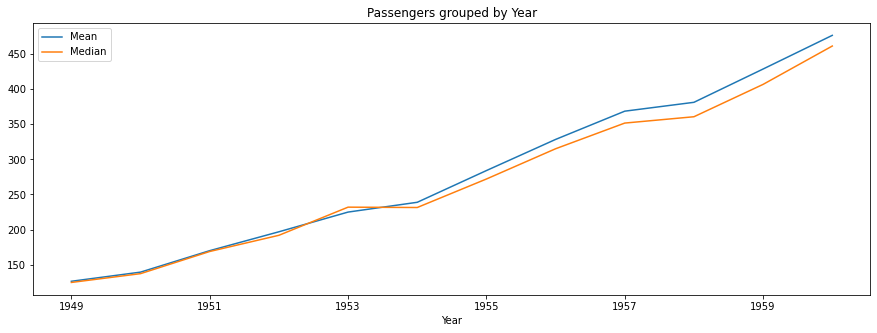

In [90]:
plt.figure(figsize=(15,5))
plt.title('Passengers grouped by Year')
df.groupby(['Year'])['Number of Passengers'].mean().plot.line(label='Mean')
df.groupby(['Year'])['Number of Passengers'].median().plot.line(label='Median')
plt.legend()
plt.show()

Passengers have been increasing over the years, both mean and median have tripled between 1949 and 1960

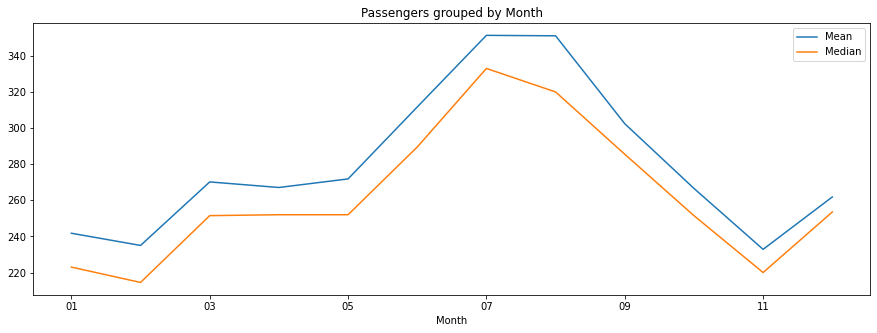

In [91]:
plt.figure(figsize=(15,5))
plt.title('Passengers grouped by Month')
df.groupby(['Month'])['Number of Passengers'].mean().plot.line(label='Mean')
df.groupby(['Month'])['Number of Passengers'].median().plot.line(label='Median')
plt.legend()
plt.show()

The busiest months for US airlines seem to be the summer months (July and August), while the traffic seems to hit its lowest in the wintern (between November and February) with a significant increse in December probably due to the holiday period

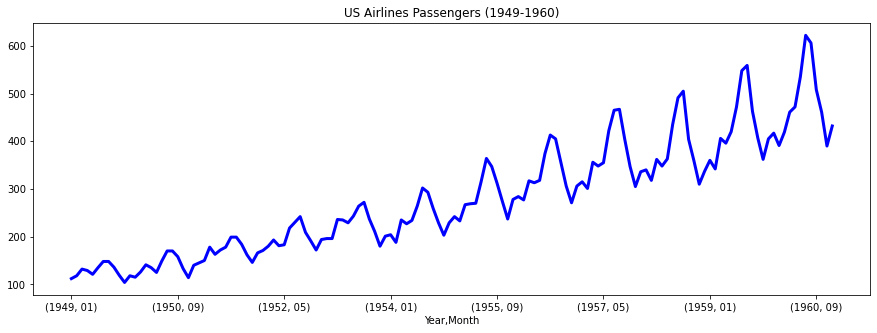

In [92]:
plt.figure(figsize=(15,5))
plt.title('US Airlines Passengers (1949-1960)')
df.groupby(['Year','Month'])['Number of Passengers'].mean().plot.line(lw=3, ls='solid', color='blue')
plt.show()

When showing the passengers across the month of each year, the time-series shows a certain repetitive pattern every year

# **6. Patterns in a Time-series** <a class="anchor" id="6"></a>


[Table of Contents](#0.1)


- Any time series visualization may consist of the following components: **Base Level + Trend + Seasonality + Error**.


### **Trend**

- A **trend** is observed when there is an increasing or decreasing slope observed in the time series. 


### **Seasonality**

- A **seasonality** is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.


However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.

### **Cyclic behaviour**

- Another important thing to consider is the **cyclic behaviour**. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. We should not confuse 'cyclic' effect with 'seasonal' effect.

- If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

# **7. Decomposition of a Time-series** <a class="anchor" id="7"></a>
- Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.

- The seasonal_decompose in statsmodels implements this conveniently.
## **7.1 Additive and Multiplicative Time-series** <a class="anchor" id="7.1"></a>

[Table of Contents](#0.1)

- We may have different combinations of trends and seasonality. Depending on the nature of the trends and seasonality, time-series can be modeled as an additive or multiplicative time-series. Each observation in the series can be expressed as either a sum or a product of the components.

### **Additive time-series:**
Value = Base Level + Trend + Seasonality + Error

### **Multiplicative Time-series:**
Value = Base Level x Trend x Seasonality x Error


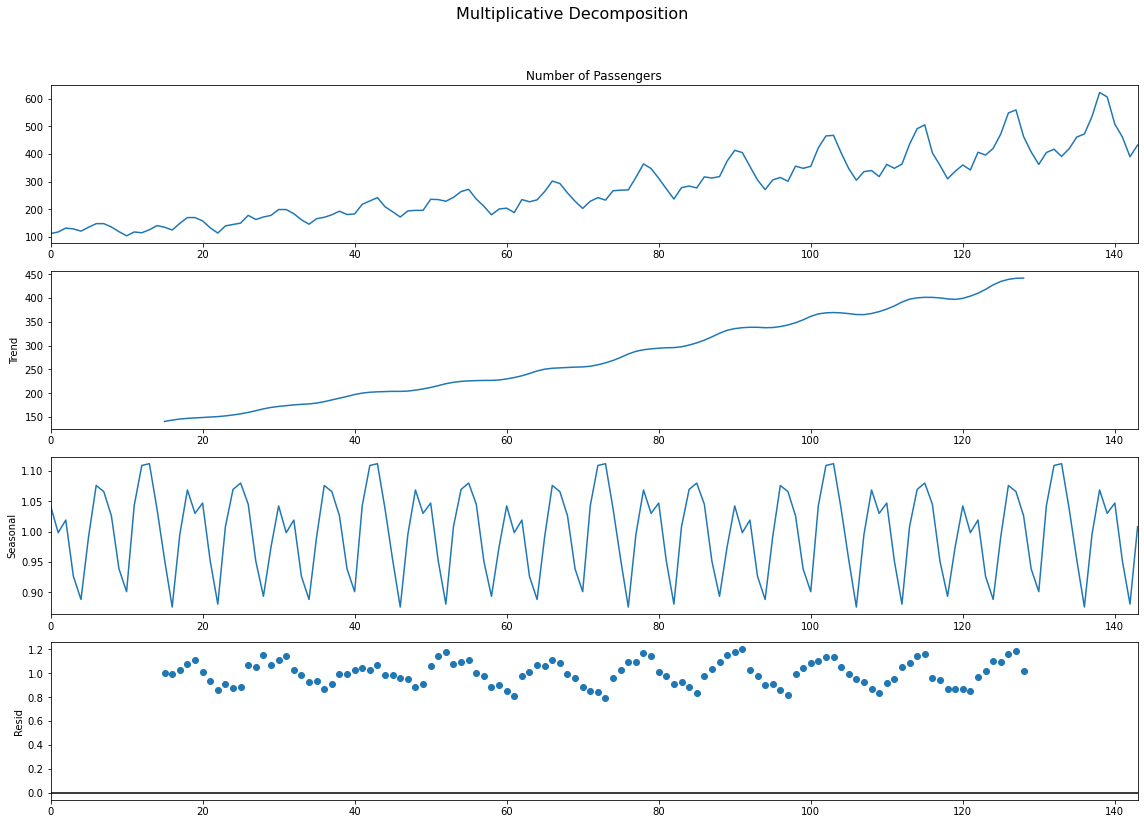

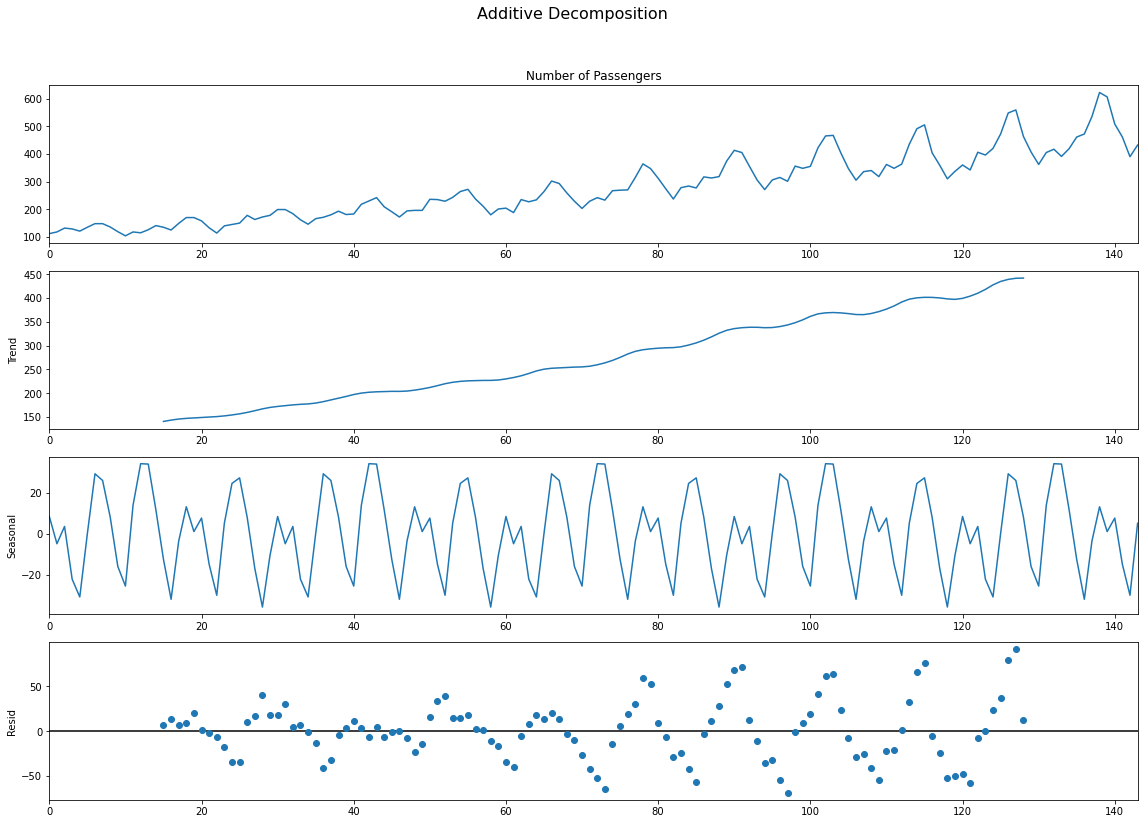

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose #Seasonal decomposition using moving averages
from dateutil.parser import parse

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30) #1 month

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30) #1 month

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# The results are obtained by first estimating the trend by applying a convolution filter to the data. 
# The trend is then removed from the series and the average of this de-trended series for each period is 
# the returned seasonal component.

Both decompositions show similar trends and seasonality but the residuals show left over components for the additive decomposition, therefore the multipicative is preferred in this case

# **8. Stationary and Non-Stationary Time-series** <a class="anchor" id="8"></a>


[Table of Contents](#0.1)


- **Stationarity** is a property of a time-series. A stationary series is one where the values of the series is not a function of time. So, the values are independent of time (consant mean, constant variance in time interval)
- A stationary time series is independent of seasonal effects as well.

![Stationary and Non-Stationary Time Series](https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png?ezimgfmt=ng:webp/ngcb1)

Image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png?ezimgfmt=ng:webp/ngcb1

It is possible to covert any non-stationary time series into a stationary one by applying a suitable transformation. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

# **9. How to make a time-series stationary?** <a class="anchor" id="9"></a>


[Table of Contents](#0.1)


Transformations may include:
1. Differencing the Series (once or more)
2. Take the log of the series
3. Take the nth root of the series
4. Combination of the above


- The most commonly used and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

**Reasons**: 
- Forecasting a stationary series is relatively easy and the forecasts are more reliable.

- An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

- We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

## **9.1 Introduction to Differencing** <a class="anchor" id="9.1"></a>


[Table of Contents](#0.1)


- If Y_t is the value at time t, then the first difference of Y = Yt – Yt-1. In simpler terms, differencing the series is nothing but subtracting the next value by the current value.


- If the first difference doesn’t make a series stationary, we can go for the second differencing and so on.


  - For example, consider the following series: [1, 5, 2, 12, 20]


  - First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]


  - Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]

# **10. How to test for stationarity?** <a class="anchor" id="10"></a>


[Table of Contents](#0.1)


- The stationarity of a series can be checked by looking at the plot of the series.


- Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.


- There are several quantitative methods we can use to determine if a given series is stationary or not. This can be done using statistical tests called [Unit Root Tests](https://en.wikipedia.org/wiki/Unit_root). This test checks if a time-series is non-stationary and possess a unit root. 


- There are multiple implementations of Unit Root tests like:


**10.1 Augmented Dickey Fuller test (ADF Test)**

**10.2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)**

**10.3. Philips Perron test (PP Test)**

## **10.1 Augmented Dickey Fuller test (ADF Test)** <a class="anchor" id="10.1"></a>


[Table of Contents](#0.1)


- **Augmented Dickey Fuller test or (ADF Test)** is the most commonly used test to detect stationarity. Here, we assume that the null hypothesis is the time series possesses a unit root and is non-stationary. Then, we collect evidence to support or reject the null hypothesis. So, if we find that the p-value in ADF test is less than the significance level (0.05), we reject the null hypothesis with 95% C.L.


- References:


https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test

https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

https://machinelearningmastery.com/time-series-data-stationary-python/

http://www.insightsbot.com/augmented-dickey-fuller-test-in-python/

https://nwfsc-timeseries.github.io/atsa-labs/sec-boxjenkins-aug-dickey-fuller.html

https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/



### **10.1.1 Difference between white noise and a stationary series** <a class="anchor" id="10.1.1"></a>


[Table of Contents](#0.1)


- Like a stationary series, the white noise is also not a function of time. So, its mean and variance does not change over time. But the difference is that, the white noise is completely random with a mean of 0. In white noise there is no pattern.

In [117]:
from statsmodels.tsa.stattools import adfuller

# generate a random time-series of length 100 (white noise)
np.random.seed(123)
ts = pd.Series(np.random.randn(100))

# perform the ADF test
result = adfuller(ts)
print('White Noise Results:')
print('ADF Statistic:', result[0])
print('p-value:', result[1])

White Noise Results:
ADF Statistic: -9.821805335371653
p-value: 5.3136917092878673e-17


Since p-value extracted from the ADF test is <0.05, the null hypothesis is rejected and we can claim the time-series is stationary (white noise is stationary, typically with mean 0)

In [95]:
print(ts.mean())
print(ts.var())

0.027109073490359778
1.2857844032568997


In [118]:
# perform the ADF test
result = adfuller(df.groupby(['Year','Month'])['Number of Passengers'].mean())
print('US Air Passengers Results:')
print('ADF Statistic:', result[0])
print('p-value:', result[1])

US Air Passengers Results:
ADF Statistic: 0.8153688792060511
p-value: 0.991880243437641


Since p-value extracted from the ADF test is ~1, the null hypothesis can't be rejected and we can claim the time-series is non-stationary (unit root exists)

White noise ha no autocorrelation (The plot should show no significant values for any lag, and the plot should look like a flat line at zero)

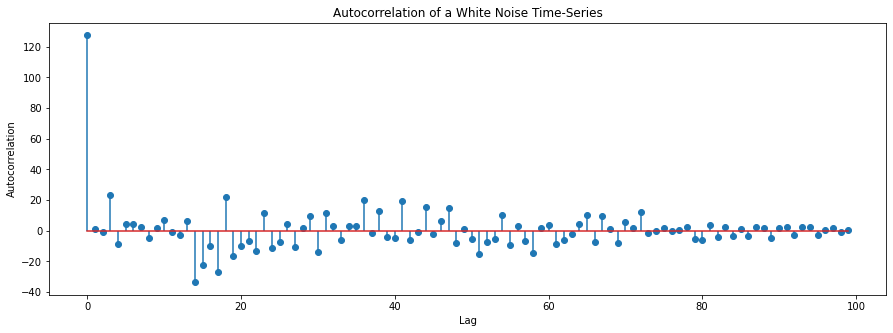

In [96]:
# calculate the autocorrelation function (ACF)
acf = np.correlate(ts, ts, mode='full')[-len(ts):]

# plot the ACF
plt.figure(figsize=(15,5))
plt.stem(acf)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of a White Noise Time-Series')
plt.show()

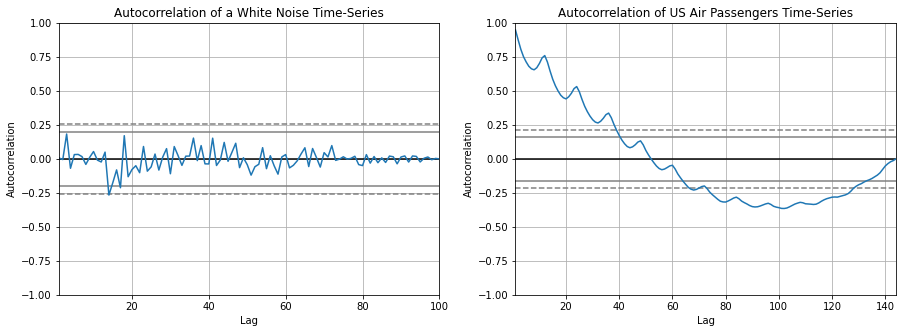

In [97]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Autocorrelation of a White Noise Time-Series')
autocorrelation_plot(ts)
plt.subplot(122)
plt.title('Autocorrelation of US Air Passengers Time-Series')
autocorrelation_plot(df.groupby(['Year','Month'])['Number of Passengers'].mean())
plt.show()

Two different behaviors can be observed in terms of autocorrelation


## **10.2 Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)** <a class="anchor" id="10.2"></a>


[Table of Contents](#0.1)


- The KPSS test, on the other hand, is used to test for trend stationarity. 


- References:


https://en.wikipedia.org/wiki/KPSS_test

https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/

https://www.statisticshowto.com/kpss-test/

https://nwfsc-timeseries.github.io/atsa-labs/sec-boxjenkins-kpss.html



## **10.3 Philips Perron test (PP Test)** <a class="anchor" id="10.3"></a>


[Table of Contents](#0.1)


- The Philips Perron or PP test is a [unit root test](https://en.wikipedia.org/wiki/Unit_root). It is used in the [time-series analysis](https://en.wikipedia.org/wiki/Time_series) to test the [null hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis) that a time-series is integrated of order 1. It is built on the ADF test discussed above.


- References:


https://en.wikipedia.org/wiki/Phillips%E2%80%93Perron_test

https://www.mathworks.com/help/econ/pptest.html

https://people.bath.ac.uk/hssjrh/Phillips%20Perron.pdf

https://www.stata.com/manuals13/tspperron.pdf

# **11. Detrend a Time-series** <a class="anchor" id="11"></a>


[Table of Contents](#0.1)


- Detrending a time series means to remove the trend component from the time series. There are multiple approaches of doing this as listed below:


1. Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, we may want to use quadratic terms (x^2) in the model.

2. We subtract the trend component obtained from time series decomposition.

3. Subtract the mean.

4. Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.


Now, we will implement the first two methods to detrend a time series.

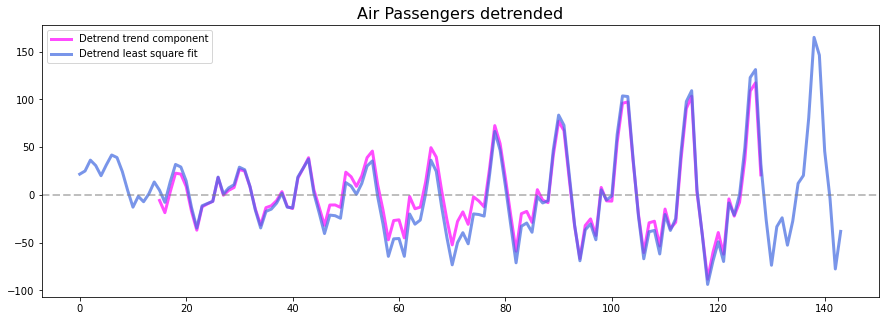

In [98]:
# Using scipy: Subtract the line of best fit
from scipy import signal
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)
detrended1 = df['Number of Passengers'].values - result_mul.trend

detrended2 = signal.detrend(df['Number of Passengers'].values)

plt.figure(figsize=(15,5))
plt.plot(detrended1, lw=3, ls='solid', color='magenta', label='Detrend trend component', alpha=0.7)
plt.plot(detrended2, lw=3, ls='solid', color='royalblue', label='Detrend least square fit', alpha=0.7)
plt.title('Air Passengers detrended', fontsize=16)
plt.axhline(0, lw=2, ls='--', color='grey', alpha=0.5)
plt.legend()
plt.show()

# **12. Deseasonalize a Time Series** <a class="anchor" id="12"></a>


[Table of Contents](#0.1)


There are multiple approaches to deseasonalize a time series. These approaches are listed below:


- 1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.

- 2. Seasonal difference the series (subtract the value of previous season from the current value).

- 3. Divide the series by the seasonal index obtained from STL decomposition.



If dividing by the seasonal index does not work well, we will take a log of the series and then do the deseasonalizing. We will later restore to the original scale by taking an exponential.


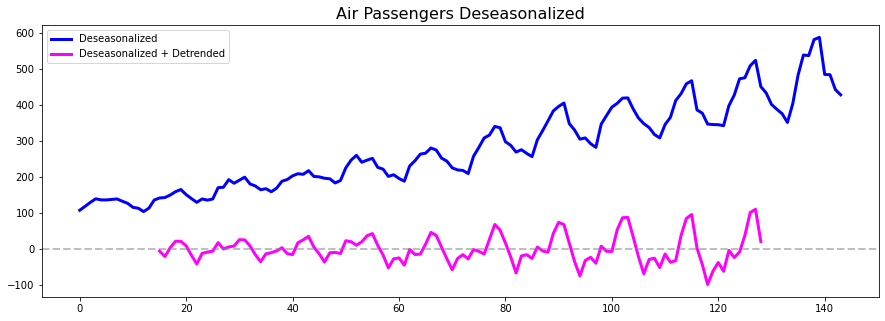

In [99]:
# Time Series Decomposition
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Subtracting the Trend Component
detrended1 = df['Number of Passengers'].values - result_mul.trend

# Deseasonalize
deseasonalized1 = df['Number of Passengers'].values / result_mul.seasonal
deseasonalized2 = detrended1 / result_mul.seasonal

plt.figure(figsize=(15,5))
plt.plot(deseasonalized1, lw=3, ls='solid', color='blue', label='Deseasonalized')
plt.plot(deseasonalized2, lw=3, ls='solid', color='magenta', label='Deseasonalized + Detrended')
plt.axhline(0, lw=2, ls='--', color='grey', alpha=0.5)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.legend()
plt.show()

# **13. How to test for seasonality of a time-series?** <a class="anchor" id="13"></a>


[Table of Contents](#0.1)



The common way to test for seasonality of a time-series is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar.


1. Hour of day
2. Day of month
3. Weekly
4. Monthly
5. Yearly

However, if we want a more definitive inspection of the seasonality, use the **Autocorrelation Function (ACF) plot**. There is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

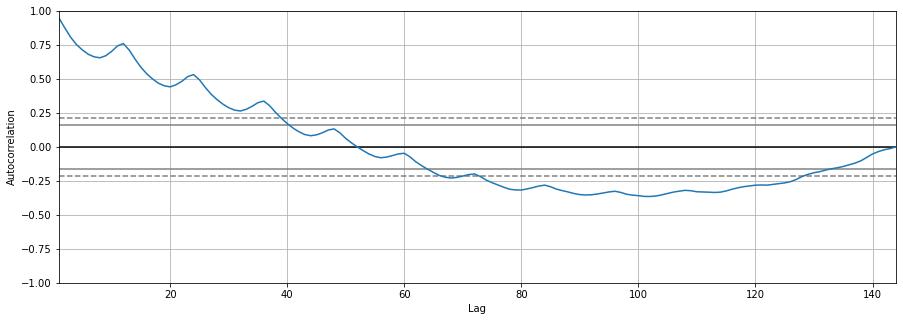

In [100]:
# Draw Plot
plt.figure(figsize=(15,5))
autocorrelation_plot(df['Number of Passengers'].tolist())
plt.show()

Alternately, if we want a statistical test, the Canova-Hansen [CHTest](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.CHTest.html#pmdarima.arima.CHTest) can determine if seasonal differencing is required to stationarize the series.

# **14. Autocorrelation and Partial Autocorrelation Functions** <a class="anchor" id="14"></a>


[Table of Contents](#0.1)


- **Autocorrelation** is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.


- **Partial Autocorrelation** also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

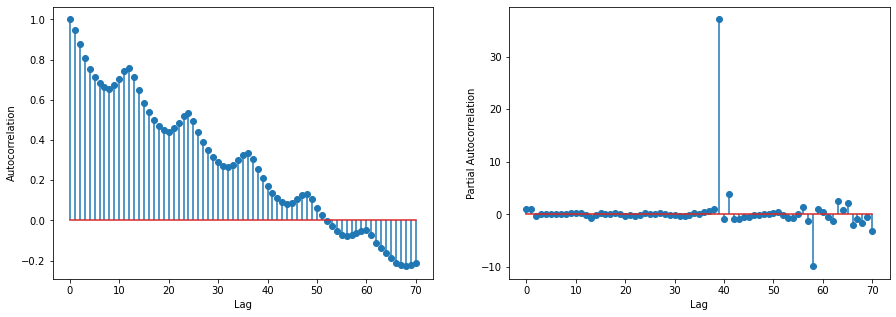

In [114]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

autocorrelations = acf(df['Number of Passengers'].tolist(), nlags=70)
partial_autocorrelations = pacf(df['Number of Passengers'].tolist(), nlags=70)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(autocorrelations)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.subplot(122)
plt.stem(partial_autocorrelations)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

# **15. Computation of Partial Autocorrelation Function** <a class="anchor" id="15"></a>


[Table of Contents](#0.1)


- The partial autocorrelation function of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y. The autoregressive equation of Y is nothing but the linear regression of Y with its own lags as predictors.


- For example, if **Y_t** is the current series and **Y_t-1** is the lag 1 of Y, then the partial autocorrelation of **lag 3 (Y_t-3)** is the coefficient $\alpha_3$ of Y_t-3 in the following equation:

![Partial Autocorrelation Function](https://www.machinelearningplus.com/wp-content/uploads/2019/02/12_5_Autoregression_Equation-min.png?ezimgfmt=ng:webp/ngcb1)

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/12_5_Autoregression_Equation-min.png?ezimgfmt=ng:webp/ngcb1

# **16. Lag Plots** <a class="anchor" id="16"></a>


[Table of Contents](#0.1)


- A **Lag plot** is a scatter plot of a time-series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.


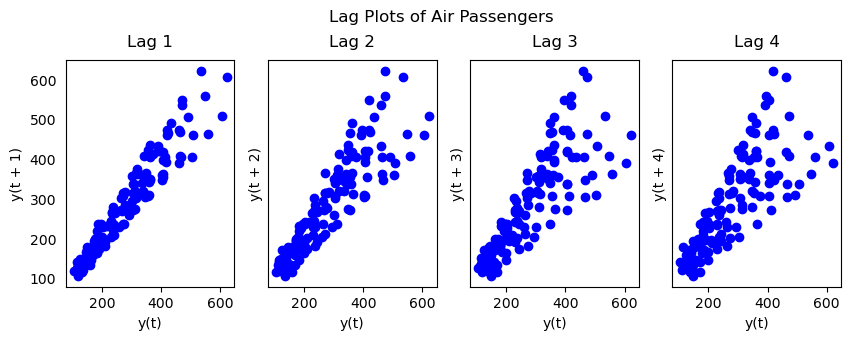

In [115]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'], lag=i+1, ax=ax, c='blue')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()

There seem to exist strong correlations between the series and its lags

# **17. Granger Causality Test** <a class="anchor" id="17"></a>


[Table of Contents](#0.1)


- **Granger causality test** is used to determine if one time series will be useful to forecast another. It is based on the idea that if X causes Y, then the forecast of Y based on previous values of Y AND the previous values of X should outperform the forecast of Y based on previous values of Y alone.


- So, **Granger causality test** should not be used to test if a lag of Y causes Y. Instead, it is generally used on exogenous (not Y lag) variables only. It is implemented in the statsmodel package.


- It accepts a 2D array with 2 columns as the main argument. The values are in the first column and the predictor (X) is in the second column. The Null hypothesis is that the series in the second column, does not Granger cause the series in the first. If the P-Values are less than a significance level (0.05) then we reject the null hypothesis and conclude that the said lag of X is indeed useful. The second argument maxlag says till how many lags of Y should be included in the test.

In [116]:
from statsmodels.tsa.stattools import grangercausalitytests
data = pd.read_csv('data/dataset.txt')
data['date'] = pd.to_datetime(data['date'])
data['month'] = data.date.dt.month
grangercausalitytests(data[['value', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


{1: ({'ssr_ftest': (54.77967483557359, 3.661425871353102e-12, 200.0, 1),
   'ssr_chi2test': (55.601369958107185, 8.876175235021574e-14, 1),
   'lrtest': (49.14260233004984, 2.38014300604565e-12, 1),
   'params_ftest': (54.77967483557369, 3.661425871352945e-12, 200.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (162.69891799873255, 1.9133235086855594e-42, 197.0, 2),
   'ssr_chi2test': (333.65666432227385, 3.5267600881273596e-73, 2),
   'lrtest': (196.9955927718221, 1.670900349911483e-43, 2),
   'params_ftest': (162.69891799873255, 1.9133235086855594e-42, 197.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

- In the above case, the p-values are very low for all tests. So the "month" feature can be used to forecast the "values".

# **18. Smoothening a Time-series** <a class="anchor" id="18"></a>


[Table of Contents](#0.1)



Smoothening of a time-series may be useful in the following circumstances:


- Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
- The smoothed version of series can be used as a feature to explain the original series itself.
- Visualize the underlying trend better.


We can smoothen a time-series using the following methods:


- Take a moving average
- Do a LOESS smoothing (Localized Regression)
- Do a LOWESS smoothing (Locally Weighted Regression)

## **Moving Average** 


- **Moving average** is the average of a rolling window of defined width. We must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.
 

## **Localized Regression**


- LOESS, short for ‘Localized Regression’ fits multiple regressions in the local neighborhood of each point. It is implemented in the statsmodels package, where you can control the degree of smoothing using frac argument which specifies the percentage of data points nearby that should be considered to fit a regression model.

# **19. References** <a class="anchor" id="19"></a>

[Table of Contents](#0.1)

The concepts and code in this notebook is taken from the following websites:-

1.	https://www.machinelearningplus.com/time-series/time-series-analysis-python/
2.	https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
3.	https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a
4.	https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3



[Go to Top](#0)